In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.gridspec as gridspec
import textwrap
import os
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
import numpy as np
import seaborn as sns

all_data = pd.read_csv('all_data.csv')

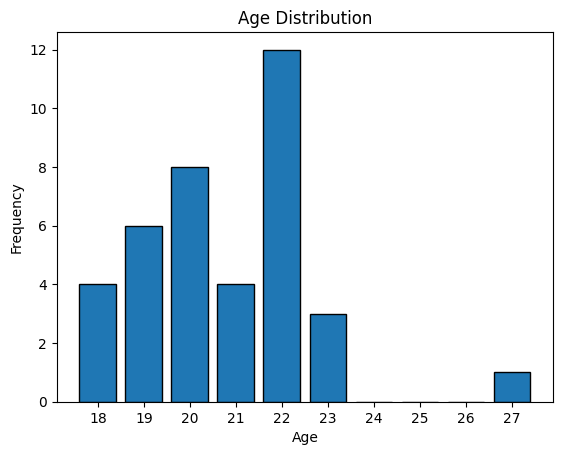

In [12]:

unique_age_df = all_data.drop_duplicates(subset=['Name', 'Age'])

bin_edges = np.arange(min(unique_age_df['Age']) - 0.5, max(unique_age_df['Age']) + 1.5, 1)

plt.hist(unique_age_df['Age'], bins=bin_edges, edgecolor='k', rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# Add an offset to the x-axis ticks to position them in the middle of the bars
plt.xticks(np.arange(min(unique_age_df['Age']), max(unique_age_df['Age']) + 1, 1))

plt.show()


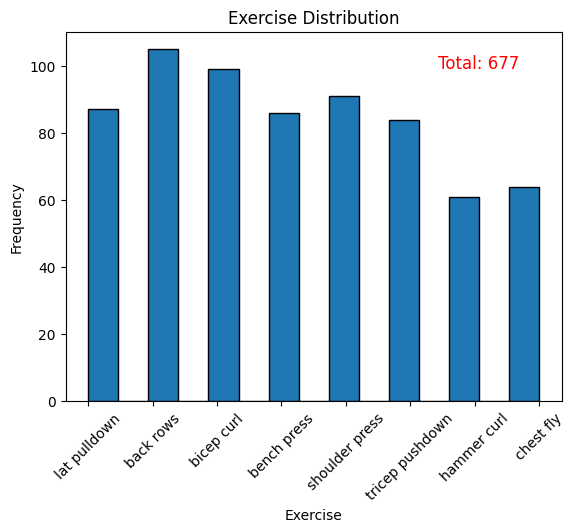

In [13]:
plt.hist(all_data['Exercise Selected'], bins=15, edgecolor='k')
plt.xlabel('Exercise')
plt.xticks(rotation=45) 
plt.ylabel('Frequency')
plt.title('Exercise Distribution')
exercise_data = all_data['Exercise Selected']
plt.text(0.75, 0.9, f'Total: {len(all_data)}', transform=plt.gca().transAxes, fontsize=12, color='r')
plt.show()

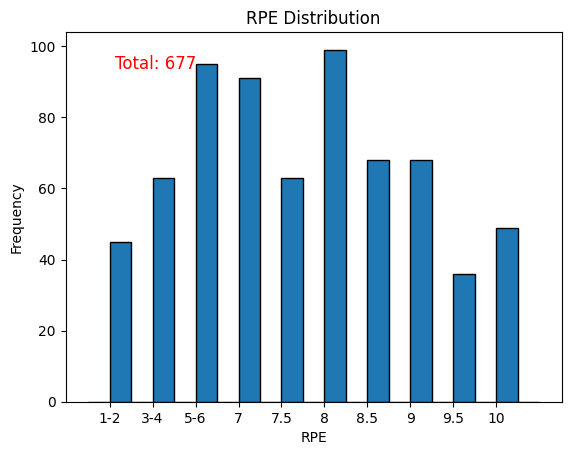

In [14]:
import matplotlib.pyplot as plt
import numpy as np

rpe_mapping = {
    '1-2': 1,
    '3-4': 2,
    '5-6': 3,
    '7': 4,
    '7.5': 5,
    '8': 6,
    '8.5': 7,
    '9': 8,
    '9.5': 9,
    '10': 10.0,
}

# Apply the mapping to create a new numerical RPE column
all_data['Numerical_RPE'] = all_data['RPE'].map(rpe_mapping)

# Calculate bin edges with spacing between the bars
bin_edges = np.arange(0.5, len(rpe_mapping) + 1.5, 0.5)  # Adjust the spacing (here, 1 unit of spacing)

# Plot the histogram using the new numerical column and adjusted bin edges
plt.hist(all_data['Numerical_RPE'], bins=bin_edges, edgecolor='k')
plt.xlabel('RPE')
plt.ylabel('Frequency')
plt.title('RPE Distribution')

# Specify custom x-tick positions and labels
x_tick_positions = list(rpe_mapping.values())
x_tick_labels = list(rpe_mapping.keys())

plt.xticks(x_tick_positions, x_tick_labels)  # Set custom x-tick positions and labels

plt.text(0.1, 0.9, f'Total: {len(all_data)}', transform=plt.gca().transAxes, fontsize=12, color='r')
plt.show()


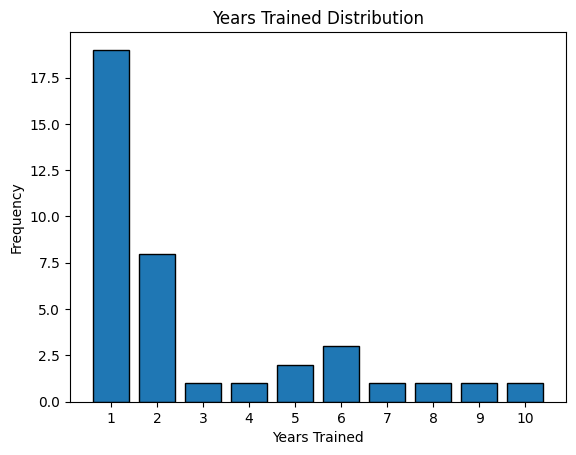

In [15]:
unique_experience_df = all_data.drop_duplicates(subset=['Name', 'Years Trained'])

bin_edges = np.arange(min(unique_experience_df['Years Trained']) - 0.5, max(unique_experience_df['Years Trained']) + 1.5, 1)

plt.hist(unique_experience_df['Years Trained'], bins=bin_edges, edgecolor='k', rwidth=0.8)
plt.xlabel('Years Trained')
plt.ylabel('Frequency')
plt.title('Years Trained Distribution')

# Add an offset to the x-axis ticks to position them in the middle of the bars
plt.xticks(np.arange(min(unique_experience_df['Years Trained']), max(unique_experience_df['Years Trained']) + 1, 1))

plt.show()


In [16]:
dfPage = 1
all_data.loc[dfPage*50:(dfPage+1)*50,['Set', 'Name', 'Exercise Selected', 'Load', 'Reps', 'RPE', 'Remarks', 'Duration', 'Id','Years Trained']]

,Set,Name,Exercise Selected,Load,Reps,RPE,Remarks,Duration,Id,Years Trained
50,2,deuz amparo,back rows,20 kg,15,9,NaN,34013,2023-09-02 09:12:27,1
51,3,kalki lamadrid,back rows,50 kg,9,8.5,NaN,26888,2023-09-02 09:13:27,6
52,3,deuz amparo,back rows,20 kg,14,10,NaN,29875,2023-09-02 09:14:32,1
53,1,kalki lamadrid,lat pulldown,10 kg,10,3-4,NaN,28066,2023-09-02 09:23:56,6
54,1,deuz amparo,lat pulldown,10 kg,12,7,NaN,18508,2023-09-02 09:25:40,1
55,2,kalki lamadrid,lat pulldown,35 kg,6,5-6,NaN,12256,2023-09-02 09:27:52,6
56,2,deuz amparo,lat pulldown,35 kg,4,9,NaN,20916,2023-09-02 09:29:39,1
57,1,kalki lamadrid,back rows,50 kg,12,7,NaN,28923,2023-09-04 19:13:37,6
58,1,raha pullon,back rows,20 kg,15,3-4,NaN,41759,2023-09-04 19:16:54,1
59,2,kalki lamadrid,back rows,60 kg,12,8,NaN,29784,2023-09-04 19:18:18,6


In [17]:
all_data['Exercise Selected'].unique()

array(['lat pulldown', 'back rows', 'bicep curl', 'bench press',
       'shoulder press', 'tricep pushdown', 'hammer curl', 'chest fly'],
      dtype=object)

In [18]:
print(all_data['Name'].unique())

['kalki lamadrid' 'lhyn mae' 'jom comedia' 'deuz amparo' 'raha pullon'
 'bryan quidlat' 'josh cabrera' 'jan bush azuela' 'andrea calayan'
 'kenn ballesteros' 'rianne alvarez' 'kim alfaro' 'ronn angkico'
 'sean bartolome' 'doreen mendoza' 'dewey cabasaan' 'lou ballesteros'
 'john carlo brinces' 'keith gerard anciro' 'jayden reyes'
 'christian balagtas' 'kristine canare' 'john francis balmeo' 'chelsea'
 'josaiah' 'felix audije' 'aron' 'calvin jacob' 'michael' 'lawrence'
 'christopher' 'kim lofamia']


In [19]:
print(len(all_data['Name'].unique()))

32


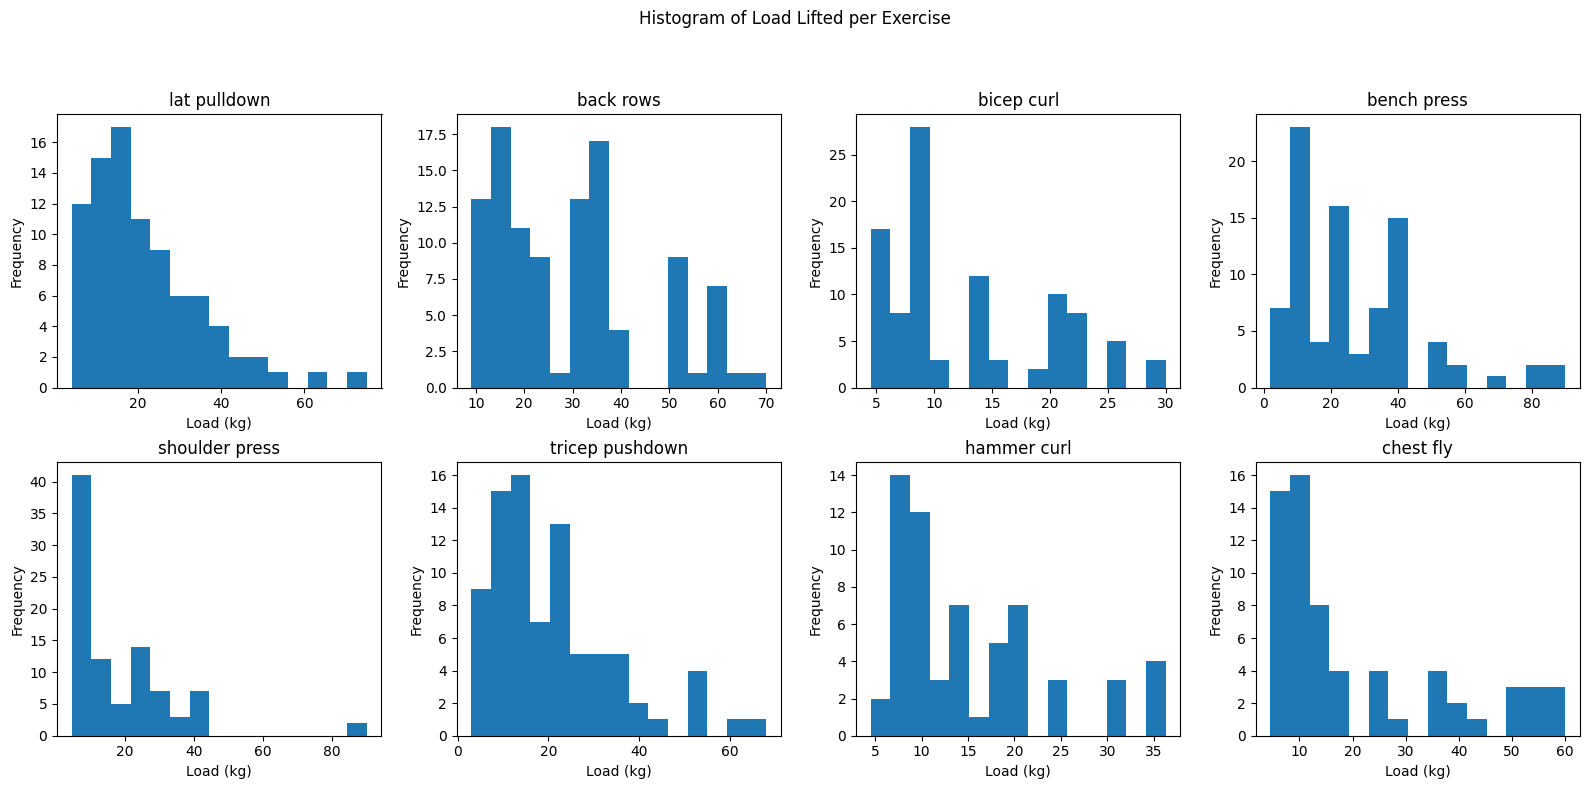

In [20]:
def convert_to_kg(load_str):
    if 'lb' in load_str:
        # Convert pounds to kilograms (1 lb = 0.453592 kg)
        return float(load_str.split()[0]) * 0.453592
    elif 'kg' in load_str:
        # If already in kilograms, return as is
        return float(load_str.split()[0])
    else:
        raise ValueError(f"Unsupported load format: {load_str}")

all_data['Load'] = all_data['Load'].apply(convert_to_kg)

# List of unique exercise names
exercises = all_data['Exercise Selected'].unique()

# Create subplots for each exercise
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle("Histogram of Load Lifted per Exercise")

# Iterate through exercises and plot histograms
for i, exercise in enumerate(exercises):
    row, col = divmod(i, 4)
    ax = axes[row, col]
    ax.hist(all_data[all_data['Exercise Selected'] == exercise]['Load'], bins=15)
    ax.set_title(exercise)
    ax.set_xlabel('Load (kg)')
    ax.set_ylabel('Frequency')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()